In [1]:
import pandas as pd
from kneed import KneeLocator
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster.elbow import kelbow_visualizer
%matplotlib inline

c:\users\alicia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
divs_data_original = pd.read_csv('./dataframes/df_trivago_basic.csv', index_col=0)

In [3]:
divs_data_original

,xpath,reduced_xpath,dom_tree_level,x_position,y_position,height,width,html_children,html_attributes,padding_top,padding_right,padding_bottom,padding_left,margin_top,margin_right,margin_bottom,margin_left
0,/html/body/div[3],/html/body/div[],3,0,0,6482.25000,1349.0,4187,2,0,0,0,0,0,0.0,0,0.0
1,/html/body/div[3]/div[2],/html/body/div[]/div[],4,0,0,120.00000,1349.0,416,1,0,0,0,0,0,0.0,0,0.0
2,/html/body/div[3]/div[2]/div[4]/div[1]/form/di...,/html/body/div[]/div[]/div[]/div[]/form/div[],8,439,123,349.00000,320.0,207,3,0,0,0,0,0,0.0,0,0.0
3,/html/body/div[3]/div[2]/div[4]/div[1]/form/di...,/html/body/div[]/div[]/div[]/div[]/form/div[]/...,9,450,169,292.00000,298.0,199,2,0,0,0,0,10,10.0,10,10.0
4,/html/body/div[3]/div[2]/div[4]/div[1]/form/di...,/html/body/div[]/div[]/div[]/div[]/form/div[]/...,10,450,169,292.00000,298.0,188,0,0,0,0,0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,/html/body/div[3]/footer/div[3],/html/body/div[]/footer/div[],5,184,6231,164.00000,980.0,29,1,0,0,0,0,0,184.5,0,184.5
331,/html/body/div[3]/footer/div[4],/html/body/div[]/footer/div[],5,0,6395,127.00000,1349.0,9,1,32,32,32,32,0,0.0,0,0.0
332,/html/body/section[1]/div,/html/body/section[]/div,4,1380,0,686.00000,1366.0,0,1,0,0,0,0,0,0.0,0,0.0
333,/html/body/div[10]/div[3],/html/body/div[]/div[],4,0,611,75.28334,1349.0,15,3,0,0,0,0,0,0.0,0,0.0


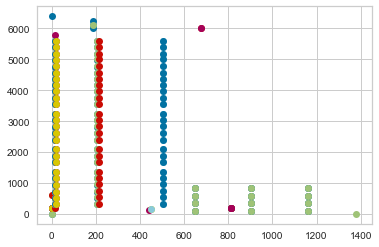

In [4]:
# Gráfica con la posición de cada uno de los elementos diferenciados
# por color según su "reduced_xpath"
groups = divs_data_original.groupby("reduced_xpath")
for name, group in groups:
    plt.plot(group["x_position"], group["y_position"], marker="o", linestyle="", label=name)

In [5]:
divs_data = divs_data_original

# Subdividir cada conjunto con el mismo "reduced_xpath" según el número de "html_attributes"
# y eliminar las subdivisiones que tengan menos de 8 elementos
for x in set(divs_data['reduced_xpath']):
    print('----------- REDUCED XPATH ' + str(x) + ' -----------')
    df = divs_data[divs_data['reduced_xpath'] == x]
    for y in set(df['html_attributes']):
        df2 = df[df['html_attributes'] == y]
        index = df2.index
        number_of_rows = len(index)
        print('----------- ' + str(y) + ' HTML ATTRIBUTES: ' + str(number_of_rows) + ' ELEMENTO/S -----------')
        print(df2)
        
        if number_of_rows < 8:
            divs_data = divs_data.drop(df2.index)

----------- REDUCED XPATH /html/body/div[]/main/div[]/div[] -----------
----------- 2 HTML ATTRIBUTES: 1 ELEMENTO/S -----------
                                  xpath                      reduced_xpath  \
6  /html/body/div[3]/main/div[1]/div[1]  /html/body/div[]/main/div[]/div[]   

   dom_tree_level  x_position  y_position  height   width  html_children  \
6               6           0         188  5728.5  1349.0           3498   

   html_attributes  padding_top  padding_right  padding_bottom  padding_left  \
6                2            0              0               0             0   

   margin_top  margin_right  margin_bottom  margin_left  
6           0           0.0              0          0.0  
----------- REDUCED XPATH /html/body/div[]/main/div[]/div[]/div[]/div/div[]/div[]/div[]/div[]/section/ol/li[]/div/article/div[]/div[]/div/div -----------
----------- 1 HTML ATTRIBUTES: 25 ELEMENTO/S -----------
                                                 xpath  \
21   /html/body/

----------- REDUCED XPATH /html/body/div[]/main/div[]/div[]/div[]/div/div[]/div[]/div[]/div[]/div/div/div/div[]/div/div[]/div/div/div[]/div[]/div[]/div/div[] -----------
----------- 1 HTML ATTRIBUTES: 12 ELEMENTO/S -----------
                                                 xpath  \
299  /html/body/div[3]/main/div[1]/div[1]/div[3]/di...   
301  /html/body/div[3]/main/div[1]/div[1]/div[3]/di...   
303  /html/body/div[3]/main/div[1]/div[1]/div[3]/di...   
305  /html/body/div[3]/main/div[1]/div[1]/div[3]/di...   
307  /html/body/div[3]/main/div[1]/div[1]/div[3]/di...   
309  /html/body/div[3]/main/div[1]/div[1]/div[3]/di...   
311  /html/body/div[3]/main/div[1]/div[1]/div[3]/di...   
313  /html/body/div[3]/main/div[1]/div[1]/div[3]/di...   
315  /html/body/div[3]/main/div[1]/div[1]/div[3]/di...   
317  /html/body/div[3]/main/div[1]/div[1]/div[3]/di...   
319  /html/body/div[3]/main/div[1]/div[1]/div[3]/di...   
321  /html/body/div[3]/main/div[1]/div[1]/div[3]/di...   

                  

In [6]:
divs_data

,xpath,reduced_xpath,dom_tree_level,x_position,y_position,height,width,html_children,html_attributes,padding_top,padding_right,padding_bottom,padding_left,margin_top,margin_right,margin_bottom,margin_left
14,/html/body/div[3]/main/div[1]/div[1]/div[3]/di...,/html/body/div[]/main/div[]/div[]/div[]/div/di...,16,16,320,200.0,780.0,124,0,0,0,0,0,0,0.0,0,0.0
15,/html/body/div[3]/main/div[1]/div[1]/div[3]/di...,/html/body/div[]/main/div[]/div[]/div[]/div/di...,18,16,320,200.0,780.0,112,1,0,0,0,0,0,0.0,0,0.0
16,/html/body/div[3]/main/div[1]/div[1]/div[3]/di...,/html/body/div[]/main/div[]/div[]/div[]/div/di...,19,16,320,200.0,187.0,19,1,2,2,2,2,0,0.0,0,0.0
17,/html/body/div[3]/main/div[1]/div[1]/div[3]/di...,/html/body/div[]/main/div[]/div[]/div[]/div/di...,20,18,322,196.0,187.0,8,2,0,0,0,0,0,0.0,0,0.0
18,/html/body/div[3]/main/div[1]/div[1]/div[3]/di...,/html/body/div[]/main/div[]/div[]/div[]/div/di...,21,18,322,187.0,187.0,7,4,187,0,0,0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,/html/body/div[3]/main/div[1]/div[1]/div[3]/di...,/html/body/div[]/main/div[]/div[]/div[]/div/di...,26,648,81,84.0,256.0,0,2,60,0,0,0,0,0.0,0,0.0
319,/html/body/div[3]/main/div[1]/div[1]/div[3]/di...,/html/body/div[]/main/div[]/div[]/div[]/div/di...,25,904,81,256.0,256.0,1,1,0,0,0,0,0,0.0,0,0.0
320,/html/body/div[3]/main/div[1]/div[1]/div[3]/di...,/html/body/div[]/main/div[]/div[]/div[]/div/di...,26,904,81,84.0,256.0,0,2,60,0,0,0,0,0.0,0,0.0
321,/html/body/div[3]/main/div[1]/div[1]/div[3]/di...,/html/body/div[]/main/div[]/div[]/div[]/div/di...,25,1160,81,256.0,256.0,1,1,0,0,0,0,0,0.0,0,0.0


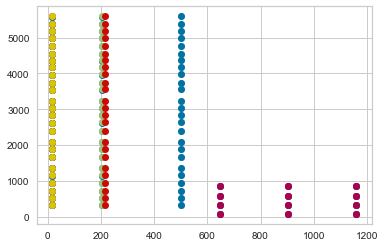

In [7]:
# Gráfica con la posición de cada uno de los elementos diferenciados
# por color según su "reduced_xpath"
groups = divs_data.groupby("reduced_xpath")
for name, group in groups:
    plt.plot(group["x_position"], group["y_position"], marker="o", linestyle="", label=name)

In [8]:
# Eliminamos los campos que no son númericos (xpath, reduced_xpath), la clasificación correcta (is_search_result)
# y la "posición y" (y_position) ya que varía mucho entre resultados de búsqueda al ser un listado vertical. 
divs_data_r = divs_data.drop(['xpath', 'reduced_xpath', 'y_position'], axis=1)
scaler = MinMaxScaler()
# Estandarización de todos los valores numéricos
divs_data_r[['dom_tree_level', 'x_position', 'height', 'width', 'html_children', 'html_attributes', 'padding_top', 'padding_right', 'padding_bottom', 'padding_left', 'margin_top', 'margin_right', 'margin_bottom', 'margin_left']] = scaler.fit_transform(divs_data_r[['dom_tree_level', 'x_position', 'height', 'width', 'html_children', 'html_attributes', 'padding_top', 'padding_right', 'padding_bottom', 'padding_left', 'margin_top', 'margin_right', 'margin_bottom', 'margin_left']])
divs_data_r

,dom_tree_level,x_position,height,width,html_children,html_attributes,padding_top,padding_right,padding_bottom,padding_left,margin_top,margin_right,margin_bottom,margin_left
14,0.000000,0.000000,0.674419,1.000000,0.898551,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0
15,0.181818,0.000000,0.674419,1.000000,0.811594,0.076923,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0
16,0.272727,0.000000,0.674419,0.000000,0.137681,0.076923,0.010695,0.166667,0.25,0.166667,0.0,0.0,0.0,0.0
17,0.363636,0.001748,0.651163,0.000000,0.057971,0.153846,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0
18,0.454545,0.001748,0.598837,0.000000,0.050725,0.307692,1.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0.909091,0.552448,0.000000,0.116358,0.000000,0.153846,0.320856,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0
319,0.818182,0.776224,1.000000,0.116358,0.007246,0.076923,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0
320,0.909091,0.776224,0.000000,0.116358,0.000000,0.153846,0.320856,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0
321,0.818182,1.000000,1.000000,0.116358,0.007246,0.076923,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0


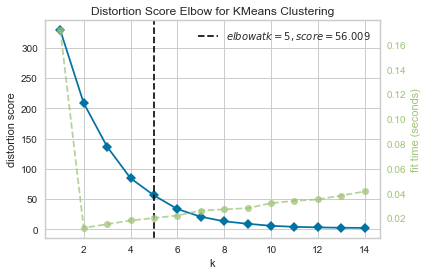

c:\users\alicia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 k=None, model=None)

In [9]:
# Gráfica del elbow method para determinar el número de clusters en kmeans
kelbow_visualizer(KMeans(random_state=4), divs_data_r, k=(1,15))

In [10]:
# Calculamos automáticamente el codo de la gráfica
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(divs_data_r)
    Sum_of_squared_distances.append(km.inertia_)
    
kn = KneeLocator(K, Sum_of_squared_distances, curve='convex', direction='decreasing')

In [11]:
# Ejecución del algoritmo kmeans con el k anteriormente calculado
model = KMeans(n_clusters=kn.knee)
model.fit(divs_data_r)
yhat = model.predict(divs_data_r)

# Añadimos al dataframe "y_position" estandarizada para poder representar los puntos
divs_data_r['y_position'] = divs_data['y_position']
scaler = MinMaxScaler()
divs_data_r[['y_position']] = scaler.fit_transform(divs_data_r[['y_position']])
# Añadimos una nueva columna "cluster" que indique a qué cluster ha sido asignado cada elemento
divs_data_r['cluster'] = yhat

In [12]:
divs_data_r

,dom_tree_level,x_position,height,width,html_children,html_attributes,padding_top,padding_right,padding_bottom,padding_left,margin_top,margin_right,margin_bottom,margin_left,y_position,cluster
14,0.000000,0.000000,0.674419,1.000000,0.898551,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.043336,3
15,0.181818,0.000000,0.674419,1.000000,0.811594,0.076923,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.043336,3
16,0.272727,0.000000,0.674419,0.000000,0.137681,0.076923,0.010695,0.166667,0.25,0.166667,0.0,0.0,0.0,0.0,0.043336,0
17,0.363636,0.001748,0.651163,0.000000,0.057971,0.153846,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.043699,0
18,0.454545,0.001748,0.598837,0.000000,0.050725,0.307692,1.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.043699,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0.909091,0.552448,0.000000,0.116358,0.000000,0.153846,0.320856,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,0
319,0.818182,0.776224,1.000000,0.116358,0.007246,0.076923,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,4
320,0.909091,0.776224,0.000000,0.116358,0.000000,0.153846,0.320856,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,4
321,0.818182,1.000000,1.000000,0.116358,0.007246,0.076923,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,4


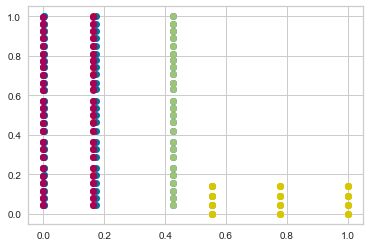

In [13]:
# Gráfica con la posición de cada uno de los elementos coloreados
# según el cluster al que pertenecen
groups = divs_data_r.groupby("cluster")
for name, group in groups:
    plt.plot(group["x_position"], group["y_position"], marker="o", linestyle="", label=name)

In [14]:
# Recuperamos las columnas "xpath" y "reduced_path" para continuar con el filtrado
divs_data_r['xpath'] = divs_data['xpath']
divs_data_r['reduced_xpath'] = divs_data['reduced_xpath']
# Datos agrupados según su cluster, donde podemos ver un resumen de sus características
divs_data_r.groupby(divs_data_r['cluster'], as_index=False).mean().sort_values(by='width', ascending=False)

,cluster,dom_tree_level,x_position,height,width,html_children,html_attributes,padding_top,padding_right,padding_bottom,padding_left,margin_top,margin_right,margin_bottom,margin_left,y_position
3,3,0.151515,0.054487,0.651860,0.894885,0.775942,0.051282,0.000000,0.0000,0.00000,0.0000,0.0,0.0,0.000000,0.0,0.529364
2,2,0.363636,0.163462,0.558837,0.190556,0.309565,0.076923,0.000000,1.0000,0.00000,1.0000,1.0,0.0,1.000000,0.0,0.530814
1,1,0.636364,0.425699,0.163488,0.165261,0.177971,1.000000,0.042781,1.0000,1.00000,1.0000,0.0,0.0,0.000000,0.0,0.530814
4,4,0.909091,0.796567,0.818182,0.116358,0.003953,0.090909,0.058337,0.0000,0.00000,0.0000,0.0,0.0,0.000000,0.0,0.069628
0,0,0.415786,0.134019,0.464395,0.064721,0.143636,0.138939,0.205820,0.0323,0.04845,0.0323,0.0,0.0,0.096899,0.0,0.515811


In [15]:
# Guarda los números de aquellos clusters con std = 0 en la columna 
# "y_position" (es decir, misma y), para posteriormente eliminarlos
delete = []

# Para aquellos clusters que contengan más de un "reduced_xpath"
# distinto, nos quedamos únicamente con el más corto.
for x in set(divs_data_r['cluster']):
    print('----------- CLUSTER ' + str(x) + ' -----------')
    df = divs_data_r[divs_data_r['cluster'] == x]
    xpath = len(set(df['reduced_xpath']))
    
    if (xpath > 1):
        df_drop = df[df['reduced_xpath'] != min(list(df['reduced_xpath']), key=len)]
        df = df.drop(df_drop.index)
        divs_data_r = divs_data_r.drop(df_drop.index)
        
    print(df['reduced_xpath'].value_counts())
    
    std = df.std(axis = 0, skipna = True)
    print("std['y_position'] == " + str(std['y_position']))
    
    if (std['y_position'] == 0):
        delete.append(x)

----------- CLUSTER 0 -----------
/html/body/div[]/main/div[]/div[]/div[]/div/div[]/div[]/div[]/div[]/section/ol/li[]/div/article/div[]/div[]    25
Name: reduced_xpath, dtype: int64
std['y_position'] == 0.2981132199961403
----------- CLUSTER 1 -----------
/html/body/div[]/main/div[]/div[]/div[]/div/div[]/div[]/div[]/div[]/section/ol/li[]/div/article/div[]/div[]/section/div[]/article/div    25
Name: reduced_xpath, dtype: int64
std['y_position'] == 0.2981132199961403
----------- CLUSTER 2 -----------
/html/body/div[]/main/div[]/div[]/div[]/div/div[]/div[]/div[]/div[]/section/ol/li[]/div/article/div[]/div[]/div    25
Name: reduced_xpath, dtype: int64
std['y_position'] == 0.2981132199961403
----------- CLUSTER 3 -----------
/html/body/div[]/main/div[]/div[]/div[]/div/div[]/div[]/div[]/div[]/section/ol/li[]/div    25
Name: reduced_xpath, dtype: int64
std['y_position'] == 0.2981132199961403
----------- CLUSTER 4 -----------
/html/body/div[]/main/div[]/div[]/div[]/div/div[]/div[]/div[]/div[]/

In [16]:
print("Clusters a eliminar con std['y_position'] == 0: " + str(delete))
# Eliminamos clusters cuyos elementos tengan la misma "y"
for i in delete:
    divs_data_r = divs_data_r[divs_data_r.cluster != i] 

Clusters a eliminar con std['y_position'] == 0: []


In [17]:
divs_data_r

,dom_tree_level,x_position,height,width,html_children,html_attributes,padding_top,padding_right,padding_bottom,padding_left,margin_top,margin_right,margin_bottom,margin_left,y_position,cluster,xpath,reduced_xpath
14,0.000000,0.000000,0.674419,1.000000,0.898551,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.043336,3,/html/body/div[3]/main/div[1]/div[1]/div[3]/di...,/html/body/div[]/main/div[]/div[]/div[]/div/di...
16,0.272727,0.000000,0.674419,0.000000,0.137681,0.076923,0.010695,0.166667,0.25,0.166667,0.0,0.0,0.0,0.0,0.043336,0,/html/body/div[3]/main/div[1]/div[1]/div[3]/di...,/html/body/div[]/main/div[]/div[]/div[]/div/di...
20,0.363636,0.163462,0.581395,0.190556,0.347826,0.076923,0.000000,1.000000,0.00,1.000000,1.0,0.0,1.0,0.0,0.044787,2,/html/body/div[3]/main/div[1]/div[1]/div[3]/di...,/html/body/div[]/main/div[]/div[]/div[]/div/di...
23,0.636364,0.425699,0.186047,0.165261,0.144928,1.000000,0.042781,1.000000,1.00,1.000000,0.0,0.0,0.0,0.0,0.044787,1,/html/body/div[3]/main/div[1]/div[1]/div[3]/di...,/html/body/div[]/main/div[]/div[]/div[]/div/di...
24,0.000000,0.000000,0.569767,1.000000,0.898551,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.081052,3,/html/body/div[3]/main/div[1]/div[1]/div[3]/di...,/html/body/div[]/main/div[]/div[]/div[]/div/di...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,0.818182,0.776224,1.000000,0.116358,0.007246,0.076923,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.139257,4,/html/body/div[3]/main/div[1]/div[1]/div[3]/di...,/html/body/div[]/main/div[]/div[]/div[]/div/di...
315,0.818182,0.552448,1.000000,0.116358,0.007246,0.076923,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.139257,4,/html/body/div[3]/main/div[1]/div[1]/div[3]/di...,/html/body/div[]/main/div[]/div[]/div[]/div/di...
317,0.818182,0.552448,1.000000,0.116358,0.007246,0.076923,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,4,/html/body/div[3]/main/div[1]/div[1]/div[3]/di...,/html/body/div[]/main/div[]/div[]/div[]/div/di...
319,0.818182,0.776224,1.000000,0.116358,0.007246,0.076923,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,4,/html/body/div[3]/main/div[1]/div[1]/div[3]/di...,/html/body/div[]/main/div[]/div[]/div[]/div/di...


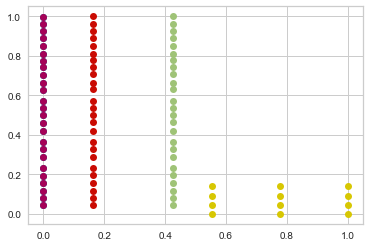

In [18]:
# Gráfica con la posición de cada uno de los elementos coloreados
# según el cluster al que pertenecen
groups = divs_data_r.groupby("cluster")
for name, group in groups:
    plt.plot(group["x_position"], group["y_position"], marker="o", linestyle="", label=name)

In [19]:
# Mostramos todos los "reduced_xpath" distintos del dataframe y su número de ocurrencias
print(divs_data_r['reduced_xpath'].value_counts())

/html/body/div[]/main/div[]/div[]/div[]/div/div[]/div[]/div[]/div[]/section/ol/li[]/div/article/div[]/div[]/section/div[]/article/div    25
/html/body/div[]/main/div[]/div[]/div[]/div/div[]/div[]/div[]/div[]/section/ol/li[]/div                                                  25
/html/body/div[]/main/div[]/div[]/div[]/div/div[]/div[]/div[]/div[]/section/ol/li[]/div/article/div[]/div[]                              25
/html/body/div[]/main/div[]/div[]/div[]/div/div[]/div[]/div[]/div[]/section/ol/li[]/div/article/div[]/div[]/div                          25
/html/body/div[]/main/div[]/div[]/div[]/div/div[]/div[]/div[]/div[]/div/div/div/div[]/div/div[]/div/div/div[]/div[]/div[]/div/div[]      12
Name: reduced_xpath, dtype: int64


In [20]:
# Nos quedamos con el cluster cuyo "reduced_xpath" esté contenido en el mayor
# número de los otros "reduced_xpath", es decir "el xpath padre"
xpath_list = list(divs_data_r['reduced_xpath'])

apariciones = 0
xpath_res = ''

for x in xpath_list:
    contador = -1
    
    for y in xpath_list:
        
        if x in y:
            contador += 1
    
    if xpath_res == '' and apariciones == 0:
        xpath_res = x
        apariciones = contador
    
    elif contador > apariciones:
        xpath_res = x
        apariciones = contador

print("--------------- REDUCED_XPATH ESCOGIDO COMO SOLUCIÓN ---------------")
print(xpath_res)

--------------- REDUCED_XPATH ESCOGIDO COMO SOLUCIÓN ---------------
/html/body/div[]/main/div[]/div[]/div[]/div/div[]/div[]/div[]/div[]/section/ol/li[]/div


In [21]:
df_res = divs_data_r[divs_data_r['reduced_xpath'] == xpath_res]
df_res

,dom_tree_level,x_position,height,width,html_children,html_attributes,padding_top,padding_right,padding_bottom,padding_left,margin_top,margin_right,margin_bottom,margin_left,y_position,cluster,xpath,reduced_xpath
14,0.0,0.0,0.674419,1.0,0.898551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043336,3,/html/body/div[3]/main/div[1]/div[1]/div[3]/di...,/html/body/div[]/main/div[]/div[]/div[]/div/di...
24,0.0,0.0,0.569767,1.0,0.898551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081052,3,/html/body/div[3]/main/div[1]/div[1]/div[3]/di...,/html/body/div[]/main/div[]/div[]/div[]/div/di...
34,0.0,0.0,0.776163,1.0,0.775362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.115503,3,/html/body/div[3]/main/div[1]/div[1]/div[3]/di...,/html/body/div[]/main/div[]/div[]/div[]/div/di...
44,0.0,0.0,0.674419,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.156482,3,/html/body/div[3]/main/div[1]/div[1]/div[3]/di...,/html/body/div[]/main/div[]/div[]/div[]/div/di...
54,0.0,0.0,0.674419,1.0,0.898551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.194198,3,/html/body/div[3]/main/div[1]/div[1]/div[3]/di...,/html/body/div[]/main/div[]/div[]/div[]/div/di...
64,0.0,0.0,0.569767,1.0,0.876812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.231913,3,/html/body/div[3]/main/div[1]/div[1]/div[3]/di...,/html/body/div[]/main/div[]/div[]/div[]/div/di...
74,0.0,0.0,0.671512,1.0,0.913043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.288849,3,/html/body/div[3]/main/div[1]/div[1]/div[3]/di...,/html/body/div[]/main/div[]/div[]/div[]/div/di...
84,0.0,0.0,0.648256,1.0,0.782609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.326383,3,/html/body/div[3]/main/div[1]/div[1]/div[3]/di...,/html/body/div[]/main/div[]/div[]/div[]/div/di...
94,0.0,0.0,0.569767,1.0,0.898551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363191,3,/html/body/div[3]/main/div[1]/div[1]/div[3]/di...,/html/body/div[]/main/div[]/div[]/div[]/div/di...
104,0.0,0.0,0.776163,1.0,0.963768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.420127,3,/html/body/div[3]/main/div[1]/div[1]/div[3]/di...,/html/body/div[]/main/div[]/div[]/div[]/div/di...


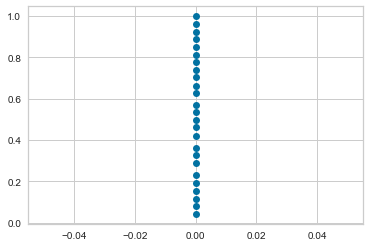

In [22]:
# Gráfica con la posición de cada uno de los elementos resultantes
groups = df_res.groupby("reduced_xpath")
for name, group in groups:
    plt.plot(group["x_position"], group["y_position"], marker="o", linestyle="", label=name)

In [23]:
# Nos quedamos con los xpaths de los elementos identificados, que podrán
# ser extraídos mediante su xpath en la aplicación que así lo necesite
df_res = df_res.drop(['dom_tree_level', 'x_position', 'height', 'width', 'html_children', 'html_attributes', 'padding_top', 'padding_right', 'padding_bottom', 'padding_left', 'margin_top', 'margin_right', 'margin_bottom', 'margin_left', 'y_position', 'cluster', 'reduced_xpath'], axis=1)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
df_res

,xpath
14,/html/body/div[3]/main/div[1]/div[1]/div[3]/div/div[1]/div[2]/div[1]/div[1]/section/ol/li[1]/div
24,/html/body/div[3]/main/div[1]/div[1]/div[3]/div/div[1]/div[2]/div[1]/div[1]/section/ol/li[2]/div
34,/html/body/div[3]/main/div[1]/div[1]/div[3]/div/div[1]/div[2]/div[1]/div[1]/section/ol/li[3]/div
44,/html/body/div[3]/main/div[1]/div[1]/div[3]/div/div[1]/div[2]/div[1]/div[1]/section/ol/li[4]/div
54,/html/body/div[3]/main/div[1]/div[1]/div[3]/div/div[1]/div[2]/div[1]/div[1]/section/ol/li[6]/div
64,/html/body/div[3]/main/div[1]/div[1]/div[3]/div/div[1]/div[2]/div[1]/div[1]/section/ol/li[7]/div
74,/html/body/div[3]/main/div[1]/div[1]/div[3]/div/div[1]/div[2]/div[1]/div[1]/section/ol/li[9]/div
84,/html/body/div[3]/main/div[1]/div[1]/div[3]/div/div[1]/div[2]/div[1]/div[1]/section/ol/li[10]/div
94,/html/body/div[3]/main/div[1]/div[1]/div[3]/div/div[1]/div[2]/div[1]/div[1]/section/ol/li[11]/div
104,/html/body/div[3]/main/div[1]/div[1]/div[3]/div/div[1]/div[2]/div[1]/div[1]/section/ol/li[13]/div
